In [63]:
# # Projeto iFood Data Analyst Case: Otimizando Campanhas de Marketing
#
# Este notebook apresenta a solução para o desafio do iFood Data Analyst Case, com o objetivo de otimizar campanhas de marketing através da análise de dados de clientes. O trabalho inclui:
#
# * **Exploração de Dados:** Compreensão das características dos clientes e seu impacto na resposta a campanhas.
# * **Segmentação de Clientes:** Criação de grupos de clientes com comportamentos e características semelhantes para direcionar estratégias de marketing.
# * **Modelo Preditivo:** Desenvolvimento de um modelo de classificação para prever a probabilidade de um cliente aceitar uma nova campanha, visando maximizar o lucro.
#
# O desafio principal é transformar uma campanha de marketing que resultou em prejuízo (-3046 MU) em uma iniciativa lucrativa, identificando os clientes com maior propensão a responder.
#
# ---
#
# ## 1. Configuração do Ambiente e Carregamento dos Dados
#
# Nesta seção, realizamos a importação das bibliotecas necessárias para a análise e o carregamento do dataset `ifood_marketing_data.csv`. Também configuramos opções de visualização para o pandas, o que é útil para exibir grandes DataFrames de forma mais legível no notebook.
import pandas as pd
import numpy as np
from IPython.display import display # Importa a função display para melhor visualização em notebooks

# Configurações de visualização (opcional, mas útil para notebooks)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [64]:
## 2. Entendimento e Pré-processamento dos Dados

#O objetivo desta etapa é compreender a estrutura, qualidade e características iniciais do dataset. Isso inclui verificar tipos de dados, identificar valores ausentes, analisar a distribuição das variáveis e realizar transformações necessárias para a modelagem.

### 2.1. Carregamento e Visão Geral do Dataset

#Nesta subseção, carregamos o arquivo `ifood_marketing_data.csv` e realizamos uma inspeção inicial para entender suas dimensões (número de linhas e colunas), visualizar as primeiras linhas e obter um resumo dos tipos de dados e valores não-nulos (`df.info()`). Isso nos dá uma primeira impressão da estrutura do nosso conjunto de dados.
# Carregamento do dataset real a partir do arquivo CSV
# Certifique-se de que o arquivo 'ifood_marketing_data.csv' está na mesma pasta do notebook.
try:
    df = pd.read_csv('ifood_marketing_data.csv')
    print("Dataset 'ifood_marketing_data.csv' carregado com sucesso!")
    print(f"Número de linhas: {df.shape[0]}")
    print(f"Número de colunas: {df.shape[1]}")
except FileNotFoundError:
    print("Erro: O arquivo 'ifood_marketing_data.csv' não foi encontrado.")
    print("Por favor, verifique se o arquivo está na pasta correta ('ifood_data_analyst').")
    # Se você quiser, pode parar a execução aqui ou carregar um DataFrame vazio para evitar erros futuros
    df = pd.DataFrame() # Cria um DataFrame vazio para não quebrar o código
    # Visualizando as primeiras 5 linhas do DataFrame e obtendo informações gerais

print("--- Primeiras 5 linhas do DataFrame (df.head()) ---")
display(df.head()) # Usamos 'display' para uma visualização mais bonita em notebooks

print("\n--- Informações gerais do DataFrame (df.info()) ---")
# Obtendo informações sobre o DataFrame: tipos de dados, valores não-nulos, uso de memória
df.info()

Dataset 'ifood_marketing_data.csv' carregado com sucesso!
Número de linhas: 2240
Número de colunas: 29
--- Primeiras 5 linhas do DataFrame (df.head()) ---


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0



--- Informações gerais do DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null 

In [65]:
### 2.2. Sumário Estatístico das Variáveis Numéricas

# Após o carregamento e a primeira inspeção, é fundamental analisar as
# estatísticas descritivas das colunas numéricas (`df.describe()`).
# Isso nos fornece um resumo rápido da distribuição dos dados, incluindo
# média, desvio padrão, valores mínimos e máximos, e quartis, que são
# essenciais para identificar possíveis problemas como outliers ou escalas
# muito diferentes entre as variáveis.
# Exibindo estatísticas descritivas para colunas numéricas
print("\n--- Estatísticas Descritivas para Colunas Numéricas (df.describe()) ---")
display(df.describe())


--- Estatísticas Descritivas para Colunas Numéricas (df.describe()) ---


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [66]:
# ### 2.3. Tratamento de Valores Ausentes e Análise de Variáveis Categóricas
#
# # Nesta etapa, realizamos uma inspeção detalhada para identificar a presença
# # e a contagem de valores nulos em cada coluna. Isso é fundamental para
# # garantir a integridade dos dados e preparar o dataset para as etapas de
# # engenharia de features e modelagem.
# #
# # Além disso, analisamos as colunas categóricas e binárias (como o status
# # marital, educação e as campanhas aceitas), verificando seus valores únicos
# # e suas respectivas contagens. Essa análise nos permite entender a
# # distribuição das categorias e identificar a necessidade de pré-processamento,
# # como a codificação one-hot para variáveis categóricas.

# Verificando a contagem de valores nulos por coluna
print("--- Contagem de Valores Nulos por Coluna ---")
null_counts = df.isnull().sum()
# Exibe apenas as colunas com valores nulos
null_cols_with_values = null_counts[null_counts > 0].sort_values(ascending=False)
if not null_cols_with_values.empty:
    display(null_cols_with_values)
else:
    print("Não há valores nulos no DataFrame.")

# Identificando colunas categóricas (usaremos 'object' e 'bool' como indicadores iniciais)
# E vamos também verificar as campanhas aceitas e o target, que são binárias.
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
binary_campaign_cols = [col for col in df.columns if 'AcceptedCmp' in col or col == 'Response' or col == 'Complain']
all_categorical_like_cols = list(set(categorical_cols + binary_campaign_cols))

print("\n--- Valores Únicos e Contagem em Colunas Categóricas/Binárias ---")
for col in all_categorical_like_cols:
    if col in df.columns: # Garante que a coluna realmente existe no DataFrame
        print(f"\nDetalhes da Coluna '{col}':")
        # Usa to_string() para formatar a saída de value_counts() como uma string
        # Isso consolida a saída em uma única "caixa" de texto.
        print(df[col].value_counts().to_string())
        if df[col].isnull().any():
            print(f"  (Há {df[col].isnull().sum()} valores nulos nesta coluna)")
        print("-" * 30) # Separador para facilitar a leitura

--- Contagem de Valores Nulos por Coluna ---


Income    24
dtype: int64


--- Valores Únicos e Contagem em Colunas Categóricas/Binárias ---

Detalhes da Coluna 'AcceptedCmp5':
AcceptedCmp5
0    2077
1     163
------------------------------

Detalhes da Coluna 'AcceptedCmp4':
AcceptedCmp4
0    2073
1     167
------------------------------

Detalhes da Coluna 'Dt_Customer':
Dt_Customer
2012-08-31    12
2014-05-12    11
2013-02-14    11
2012-09-12    11
2014-05-22    10
2013-08-20    10
2013-01-02     9
2014-03-23     9
2014-04-05     9
2012-10-29     9
2014-03-01     9
2014-05-11     8
2013-11-07     8
2012-08-29     8
2013-04-05     8
2012-08-22     8
2013-06-03     8
2012-08-17     8
2012-11-23     8
2013-10-28     8
2013-01-12     8
2012-11-03     8
2013-08-31     8
2014-05-23     8
2013-05-11     8
2012-11-09     8
2013-10-04     7
2014-02-07     7
2013-08-07     7
2013-02-13     7
2013-10-25     7
2013-10-02     7
2013-01-10     7
2013-01-16     7
2013-06-04     7
2013-02-20     7
2012-08-08     7
2014-05-02     7
2014-03-30     7
2013-02-16     7
2014-0

In [67]:
# ### 2.4. Tratamento Específico da Coluna 'Income'
#
# # Nesta etapa, focamos no tratamento dos valores ausentes
# # especificamente na coluna 'Income' (Renda).
# # Optamos por preencher os valores nulos com a **mediana** da renda.
# # A mediana é uma medida de tendência central mais robusta a outliers
# # do que a média, garantindo que valores extremos de renda não distorçam
# # a imputação e, consequentemente, as análises e modelos subsequentes.
# # Após o preenchimento, confirmamos que não há mais valores nulos nesta coluna
# # e que o DataFrame está completamente livre de valores ausentes.
# 1.3.1 Tratamento de Valores Nulos
print("--- Tratamento de Valores Nulos ---")

# Contagem inicial de nulos em 'Income'
initial_nulls_income = df['Income'].isnull().sum()
print(f"Valores nulos em 'Income' antes do tratamento: {initial_nulls_income}")

# Preenchendo valores nulos na coluna 'Income' com a mediana
# (A mediana é escolhida para ser mais robusta a outliers de renda)
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Verificando se os nulos foram tratados
final_nulls_income = df['Income'].isnull().sum()
print(f"Valores nulos em 'Income' após o tratamento: {final_nulls_income}")

if final_nulls_income == 0:
    print(f"Coluna 'Income' preenchida com a mediana ({median_income:.2f}) com sucesso.")
else:
    print("Ainda existem valores nulos em 'Income'. Investigar!")

# Verificação geral de nulos no DataFrame após o tratamento
print("\n--- Verificação Geral de Valores Nulos no DataFrame ---")
display(df.isnull().sum()[df.isnull().sum() > 0])
if df.isnull().sum().sum() == 0:
    print("Nenhum valor nulo restante no DataFrame.")

--- Tratamento de Valores Nulos ---
Valores nulos em 'Income' antes do tratamento: 24
Valores nulos em 'Income' após o tratamento: 0
Coluna 'Income' preenchida com a mediana (51381.50) com sucesso.

--- Verificação Geral de Valores Nulos no DataFrame ---


C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\565591137.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)


Series([], dtype: int64)

Nenhum valor nulo restante no DataFrame.


In [68]:
# ### 2.5. Tratamento de Inconsistências em Variáveis Categóricas
#
# # Nesta subseção, abordamos inconsistências e valores anômalos
# # na coluna categórica `Marital_Status`. Observamos categorias como
# # 'Alone', 'Absurd' e 'YOLO', que não se encaixam nas definições
# # padrão de estado civil e podem ser consideradas erros de entrada
# # ou variações de 'Single'.
# #
# # Para simplificar e padronizar essa variável, mapeamos todas essas
# # categorias anômalas para 'Single'. Isso consolida os dados e garante
# # que o modelo não seja prejudicado por categorias de baixa frequência
# # ou sem sentido. Após o tratamento, verificamos as novas contagens
# # de valores únicos para confirmar a padronização.
# 1.3.2 Tratamento de Inconsistências em Colunas Categóricas
print("\n--- Tratamento de Inconsistências em 'Marital_Status' ---")

# Mapeando as categorias anômalas para 'Single'
# 'Alone' pode ser visto como uma variação de solteiro.
# 'Absurd' e 'YOLO' são claramente erros e podem ser agrupados com 'Single' para simplificar.
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

# Verificando as categorias únicas após o tratamento
print("Novas contagens de valores únicos em 'Marital_Status' após o tratamento:")
print(df['Marital_Status'].value_counts().to_string())


--- Tratamento de Inconsistências em 'Marital_Status' ---
Novas contagens de valores únicos em 'Marital_Status' após o tratamento:
Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77


In [69]:
# ### 2.6. Criação de Feature: `Age` (Idade do Cliente) e Tratamento de Outliers
#
# # Calculamos a idade do cliente (`Age`) subtraindo o ano de nascimento
# # (`Year_Birth`) do ano de referência dos dados (o ano máximo de `Dt_Customer`).
# # Esta feature é crucial para a segmentação e modelagem, pois a idade
# # pode influenciar o comportamento de compra e a resposta a campanhas.
# #
# # Identificamos e tratamos outliers na coluna `Year_Birth` (e,
# # consequentemente, em `Age`). Observamos anos de nascimento
# # anomais, como 1900, que gerariam idades irrealistas. Para garantir a
# # qualidade dos dados, removemos as linhas que contêm esses outliers,
# # focando apenas nos dados consistentes para a análise.
# 1.3.3 Conversão de Tipo e Criação de Feature: Dt_Customer
print("\n--- Tratamento de 'Dt_Customer' e Criação de 'Years_Customer' ---")

# 1. Converter 'Dt_Customer' para tipo datetime
# errors='coerce' transformará qualquer data inválida em NaT (Not a Time)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
print("Coluna 'Dt_Customer' convertida para tipo datetime.")

# Verificando se houve NaT após a conversão (caso algum formato de data seja inválido)
if df['Dt_Customer'].isnull().sum() > 0:
    print(f"ATENÇÃO: {df['Dt_Customer'].isnull().sum()} valores NaT encontrados em 'Dt_Customer' após a conversão.")
    # Pode ser necessário um tratamento adicional aqui, mas para este caso, assumimos que as datas são válidas.

# 2. Extrair o ano mais recente dos dados
# Isso nos dá uma "data de referência" para calcular a idade do cliente no cadastro.
# Usaremos o ano máximo de Dt_Customer como o ano de referência para a "idade" do cliente na empresa.
# Alternativamente, poderíamos usar o ano atual (datetime.now().year), mas o ano dos dados é mais consistente.
max_year_customer = df['Dt_Customer'].dt.year.max()
print(f"Ano de referência para cálculo da idade do cliente: {max_year_customer}")


# 3. Criar a feature 'Years_Customer' (anos desde o cadastro do cliente)
# Cuidado com possíveis nulos em Year_Birth e Dt_Customer
df['Years_Customer'] = max_year_customer - df['Dt_Customer'].dt.year
print("Coluna 'Years_Customer' (tempo de cliente em anos) criada com sucesso.")

# Exibir as primeiras linhas com a nova coluna e o info para Dt_Customer
print("\n--- Primeiras linhas com 'Dt_Customer' e 'Years_Customer' e info para 'Dt_Customer' ---")
display(df[['Dt_Customer', 'Years_Customer']].head())
print("\nInformações da coluna 'Dt_Customer' após conversão:")
df['Dt_Customer'].info()


--- Tratamento de 'Dt_Customer' e Criação de 'Years_Customer' ---
Coluna 'Dt_Customer' convertida para tipo datetime.
Ano de referência para cálculo da idade do cliente: 2014
Coluna 'Years_Customer' (tempo de cliente em anos) criada com sucesso.

--- Primeiras linhas com 'Dt_Customer' e 'Years_Customer' e info para 'Dt_Customer' ---


,Dt_Customer,Years_Customer
0,2012-09-04,2
1,2014-03-08,0
2,2013-08-21,1
3,2014-02-10,0
4,2014-01-19,0



Informações da coluna 'Dt_Customer' após conversão:
<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [70]:
# ### 2.8. Engenharia de Features de Comportamento e Demografia
#
# # Nesta etapa, criamos novas features que sumarizam o comportamento
# # de compra e aspectos demográficos dos clientes, agregando valor
# # para análises e modelagem.
# #
# # 1. **`Age` (Idade do Cliente):** Calculada a partir do `Year_Birth`
# #    e do ano de referência dos dados, fornecendo um dado demográfico
# #    essencial para a segmentação de público.
# # 2. **`Total_Spending` (Gasto Total):** A soma dos gastos em todas
# #    as categorias de produtos (`MntWines`, `MntFruits`, etc.)
# #    resulta em uma métrica robusta do valor monetário do cliente.
# # 3. **`Total_Purchases` (Número Total de Compras):** A soma das
# #    compras realizadas por diferentes canais (`NumDealsPurchases`,
# #    `NumWebPurchases`, etc.) reflete a frequência de engajamento do cliente.
# #
# # A criação dessas features permite uma visão mais completa do perfil
# # do cliente, contribuindo para uma segmentação mais rica e modelos
# # preditivos mais precisos.
# 1.3.4 Engenharia de Features Adicionais

print("--- Criação de Features Derivadas ---")

# 1. Criar 'Age' (Idade do Cliente)
# Usaremos o ano de referência (2014, o ano máximo em Dt_Customer) para calcular a idade
current_year_for_age = df['Dt_Customer'].dt.year.max()
df['Age'] = current_year_for_age - df['Year_Birth']
print(f"Feature 'Age' criada (calculada com base no ano {current_year_for_age}).")

# 2. Criar 'Total_Spending' (Gasto Total em Produtos)
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
print("Feature 'Total_Spending' criada (soma dos gastos com produtos).")

# 3. Criar 'Total_Purchases' (Número Total de Compras)
purchases_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchases_cols].sum(axis=1)
print("Feature 'Total_Purchases' criada (soma das compras por canal).")

# Exibir as primeiras linhas com as novas colunas para verificação
print("\n--- Primeiras linhas com as novas features ---")
display(df[['Year_Birth', 'Age', 'Total_Spending', 'Total_Purchases']].head())

# Exibir estatísticas descritivas para as novas features para uma rápida checagem
print("\n--- Estatísticas Descritivas para 'Age', 'Total_Spending', 'Total_Purchases' ---")
display(df[['Age', 'Total_Spending', 'Total_Purchases']].describe())

--- Criação de Features Derivadas ---
Feature 'Age' criada (calculada com base no ano 2014).
Feature 'Total_Spending' criada (soma dos gastos com produtos).
Feature 'Total_Purchases' criada (soma das compras por canal).

--- Primeiras linhas com as novas features ---


,Year_Birth,Age,Total_Spending,Total_Purchases
0,1957,57,1617,25
1,1954,60,27,6
2,1965,49,776,21
3,1984,30,53,8
4,1981,33,422,19



--- Estatísticas Descritivas para 'Age', 'Total_Spending', 'Total_Purchases' ---


,Age,Total_Spending,Total_Purchases
count,2240.000000,2240.000000,2240.000000
mean,45.194196,605.798214,14.862054
std,11.984069,602.249288,7.677173
min,18.000000,5.000000,0.000000
25%,37.000000,68.750000,8.000000
50%,44.000000,396.000000,15.000000
75%,55.000000,1045.500000,21.000000
max,121.000000,2525.000000,44.000000


In [71]:
# ### 2.9. Tratamento de Outliers: Idade Anômala
#
# # Prosseguindo com a limpeza de dados, esta etapa se concentra
# # na identificação e tratamento de outliers na coluna `Age` (idade do cliente).
# # Observamos que algumas idades calculadas eram irrealistas (ex: acima de 90 anos),
# # indicando prováveis erros no `Year_Birth` original.
# #
# # Para garantir a consistência e a qualidade dos dados para modelagem,
# # definimos um limite de idade razoável (por exemplo, 90 anos).
# # As poucas linhas que excediam este limite foram removidas do DataFrame.
# # Essa remoção evita que dados incorretos influenciem negativamente
# # as análises subsequentes e o desempenho do modelo preditivo.
# # As estatísticas descritivas da idade são exibidas novamente para
# # confirmar a efetividade do tratamento.
# 1.3.5 Tratamento de Outliers: Idade Anômala
print("--- Investigando Outliers na Idade ---")

# Identificar as linhas com idade acima de um limite razoável (ex: 90 anos)
# A idade máxima de 121 anos é suspeita. Vamos ver os detalhes dessas linhas.
outlier_age_threshold = 90
age_outliers = df[df['Age'] > outlier_age_threshold]

print(f"Linhas com 'Age' maior que {outlier_age_threshold} anos:")
if not age_outliers.empty:
    display(age_outliers[['ID', 'Year_Birth', 'Age', 'Dt_Customer', 'Income', 'Education', 'Marital_Status']])
    # Para fins de demonstração, vamos considerar que estas idades muito altas são erros de digitação
    # e, por serem poucas, a remoção pode ser uma opção viável.
    # Poderíamos também "limitar" a idade a um valor máximo razoável, se houvesse muitos.
    # Por exemplo, df['Age'] = np.where(df['Age'] > 90, 90, df['Age'])

    # Decisão: Remover essas linhas por serem poucas e com dados provavelmente incorretos.
    initial_rows = df.shape[0]
    df = df[df['Age'] <= outlier_age_threshold].copy() # Usar .copy() para evitar SettingWithCopyWarning
    removed_rows = initial_rows - df.shape[0]
    print(f"\n{removed_rows} linha(s) com idade anômala (>{outlier_age_threshold}) removida(s).")
    print(f"Número de linhas no DataFrame após remoção: {df.shape[0]}")
else:
    print("Nenhuma idade anômala (maior que 90 anos) encontrada.")

# Verificar as estatísticas de 'Age' novamente após o tratamento
print("\n--- Estatísticas Descritivas de 'Age' após o tratamento ---")
display(df['Age'].describe())

--- Investigando Outliers na Idade ---
Linhas com 'Age' maior que 90 anos:


,ID,Year_Birth,Age,Dt_Customer,Income,Education,Marital_Status
192,7829,1900,114,2013-09-26,36640.0,2n Cycle,Divorced
239,11004,1893,121,2014-05-17,60182.0,2n Cycle,Single
339,1150,1899,115,2013-09-26,83532.0,PhD,Together



3 linha(s) com idade anômala (>90) removida(s).
Número de linhas no DataFrame após remoção: 2237

--- Estatísticas Descritivas de 'Age' após o tratamento ---


count    2237.000000
mean       45.098346
std        11.701917
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

In [72]:
# ### 2.10. Engenharia de Features: `Children` e `HasChildren`
#
# # Nesta etapa, consolidamos as informações sobre a presença de filhos
# # no lar em novas features mais intuitivas para a análise.
# #
# # 1. **`Children`:** Criamos esta feature somando `Kidhome` (número de crianças
# #    pequenas em casa) e `Teenhome` (número de adolescentes em casa).
# #    Isso nos dá o número total de dependentes juvenis, simplificando a
# #    representação de um aspecto demográfico importante.
# # 2. **`HasChildren`:** Uma flag binária (0 ou 1) que indica se o cliente
# #    possui qualquer filho em casa. Esta feature simplifica a análise da
# #    influência da presença de filhos na resposta a campanhas.
# #
# # As contagens de valores únicos para ambas as novas features são exibidas
# # para confirmar sua criação e distribuição.
# 1.3.6 Engenharia de Features: Número de Filhos

print("\n--- Criação de Features Derivadas: Filhos ---")

# 1. Criar 'Children' (Número total de filhos/adolescentes em casa)
df['Children'] = df['Kidhome'] + df['Teenhome']
print("Feature 'Children' (soma de Kidhome e Teenhome) criada com sucesso.")

# 2. Criar 'HasChildren' (Flag binária: 1 se tem filhos, 0 se não tem)
df['HasChildren'] = (df['Children'] > 0).astype(int)
print("Feature 'HasChildren' (flag binária) criada com sucesso.")

# Exibir as primeiras linhas com as novas colunas para verificação
print("\n--- Primeiras linhas com 'Kidhome', 'Teenhome', 'Children', 'HasChildren' ---")
display(df[['Kidhome', 'Teenhome', 'Children', 'HasChildren']].head())

# Exibir contagem de valores únicos para 'Children' e 'HasChildren'
print("\n--- Contagem de valores para 'Children' ---")
print(df['Children'].value_counts().to_string())

print("\n--- Contagem de valores para 'HasChildren' ---")
print(df['HasChildren'].value_counts().to_string())


--- Criação de Features Derivadas: Filhos ---
Feature 'Children' (soma de Kidhome e Teenhome) criada com sucesso.
Feature 'HasChildren' (flag binária) criada com sucesso.

--- Primeiras linhas com 'Kidhome', 'Teenhome', 'Children', 'HasChildren' ---


,Kidhome,Teenhome,Children,HasChildren
0,0,0,0,0
1,1,1,2,1
2,0,0,0,0
3,1,0,1,1
4,1,0,1,1



--- Contagem de valores para 'Children' ---
Children
1    1126
0     637
2     421
3      53

--- Contagem de valores para 'HasChildren' ---
HasChildren
1    1600
0     637


In [73]:
# ### 2.11. Limpeza Final: Remoção de Colunas Constantes e Irrelevantes
#
# # Nesta etapa de pré-processamento final, verificamos e removemos colunas
# # que não adicionam valor à análise ou modelagem.
# #
# # Especificamente, focamos nas colunas `Z_CostContact` e `Z_Revenue`.
# # Se uma coluna possui apenas um valor único para todas as linhas,
# # ela é considerada constante e não contribui para a variabilidade
# # ou poder preditivo do modelo.
# #
# # Ao remover essas colunas, garantimos que o DataFrame contenha apenas
# # features relevantes, otimizando o processo de modelagem e evitando
# # ruídos desnecessários. O `df.info()` final é exibido para confirmar
# # a estrutura do DataFrame após esta limpeza.
# 1.3.7 Verificação e Remoção de Colunas Constantes/Irrelevantes

print("\n--- Verificando e Tratando Colunas Z_CostContact e Z_Revenue ---")

# Colunas a serem verificadas
cols_to_check = ['Z_CostContact', 'Z_Revenue']
cols_to_drop = []

for col in cols_to_check:
    if col in df.columns:
        if df[col].nunique() == 1:
            print(f"A coluna '{col}' é constante (todos os valores são iguais: {df[col].iloc[0]}). Será removida.")
            cols_to_drop.append(col)
        else:
            print(f"A coluna '{col}' possui mais de um valor único e será mantida. Valores únicos: {df[col].nunique()}")
    else:
        print(f"A coluna '{col}' não existe no DataFrame.")

# Remover as colunas identificadas
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f"\nColunas removidas: {cols_to_drop}")
    print(f"Formato do DataFrame após remoção: {df.shape}")
else:
    print("\nNenhuma coluna para remover.")

# Verificação final do info do DataFrame para confirmar as remoções
print("\n--- Informações finais do DataFrame (amostra das colunas) ---")
df.info(verbose=True, show_counts=True)


--- Verificando e Tratando Colunas Z_CostContact e Z_Revenue ---
A coluna 'Z_CostContact' é constante (todos os valores são iguais: 3). Será removida.
A coluna 'Z_Revenue' é constante (todos os valores são iguais: 11). Será removida.

Colunas removidas: ['Z_CostContact', 'Z_Revenue']
Formato do DataFrame após remoção: (2237, 33)

--- Informações finais do DataFrame (amostra das colunas) ---
<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64

In [74]:
# ## 3. Análise Exploratória de Dados (EDA)
#
# # Nesta seção, aprofundamos o entendimento das características dos clientes
# # e as relações entre as variáveis, com foco especial na `Response` (resposta
# # à última campanha de marketing). O objetivo é identificar padrões, insights
# # e oportunidades que possam informar as estratégias de segmentação e
# # o desenvolvimento do modelo preditivo.
# #
# # Iniciamos com uma visão geral do DataFrame após o pré-processamento,
# # verificando novamente os tipos de dados e as estatísticas descritivas
# # para as colunas numéricas e categóricas.
# 2.0 Análise Exploratória de Dados (EDA) - Visão Geral
print("\n--- Visão Geral do DataFrame Preparado para Análise Exploratória ---")

# Exibir as informações básicas do DataFrame
print("\nInformações do DataFrame (tipos de dados e contagem de não-nulos):")
df.info()

# Exibir estatísticas descritivas para colunas numéricas
print("\nEstatísticas Descritivas para Colunas Numéricas:")
display(df.describe())

# Exibir estatísticas descritivas para colunas categóricas (objetos)
print("\nEstatísticas Descritivas para Colunas Categóricas:")
display(df.describe(include='object'))


--- Visão Geral do DataFrame Preparado para Análise Exploratória ---

Informações do DataFrame (tipos de dados e contagem de não-nulos):
<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProduct

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Years_Customer,Age,Total_Spending,Total_Purchases,Children,HasChildren
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52227.407689,0.444345,0.506482,2013-07-10 05:01:54.260169728,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,0.149307,0.972284,45.098346,605.743406,14.870809,0.950827,0.715244
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,0.000000
25%,2829.000000,1959.000000,35523.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,69.000000,8.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.000000,396.000000,15.000000,1.000000,1.000000
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,55.000000,1045.000000,21.000000,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,74.000000,2525.000000,44.000000,3.000000,1.000000
std,3245.118591,11.701917,25043.266830,0.538467,0.544593,NaN,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.356471,0.684704,11.701917,601.840466,7.676593,0.752037,0.451399



Estatísticas Descritivas para Colunas Categóricas:


,Education,Marital_Status
count,2237,2237
unique,5,5
top,Graduation,Married
freq,1127,864



--- Visualizando a Distribuição de Variáveis Chave ---


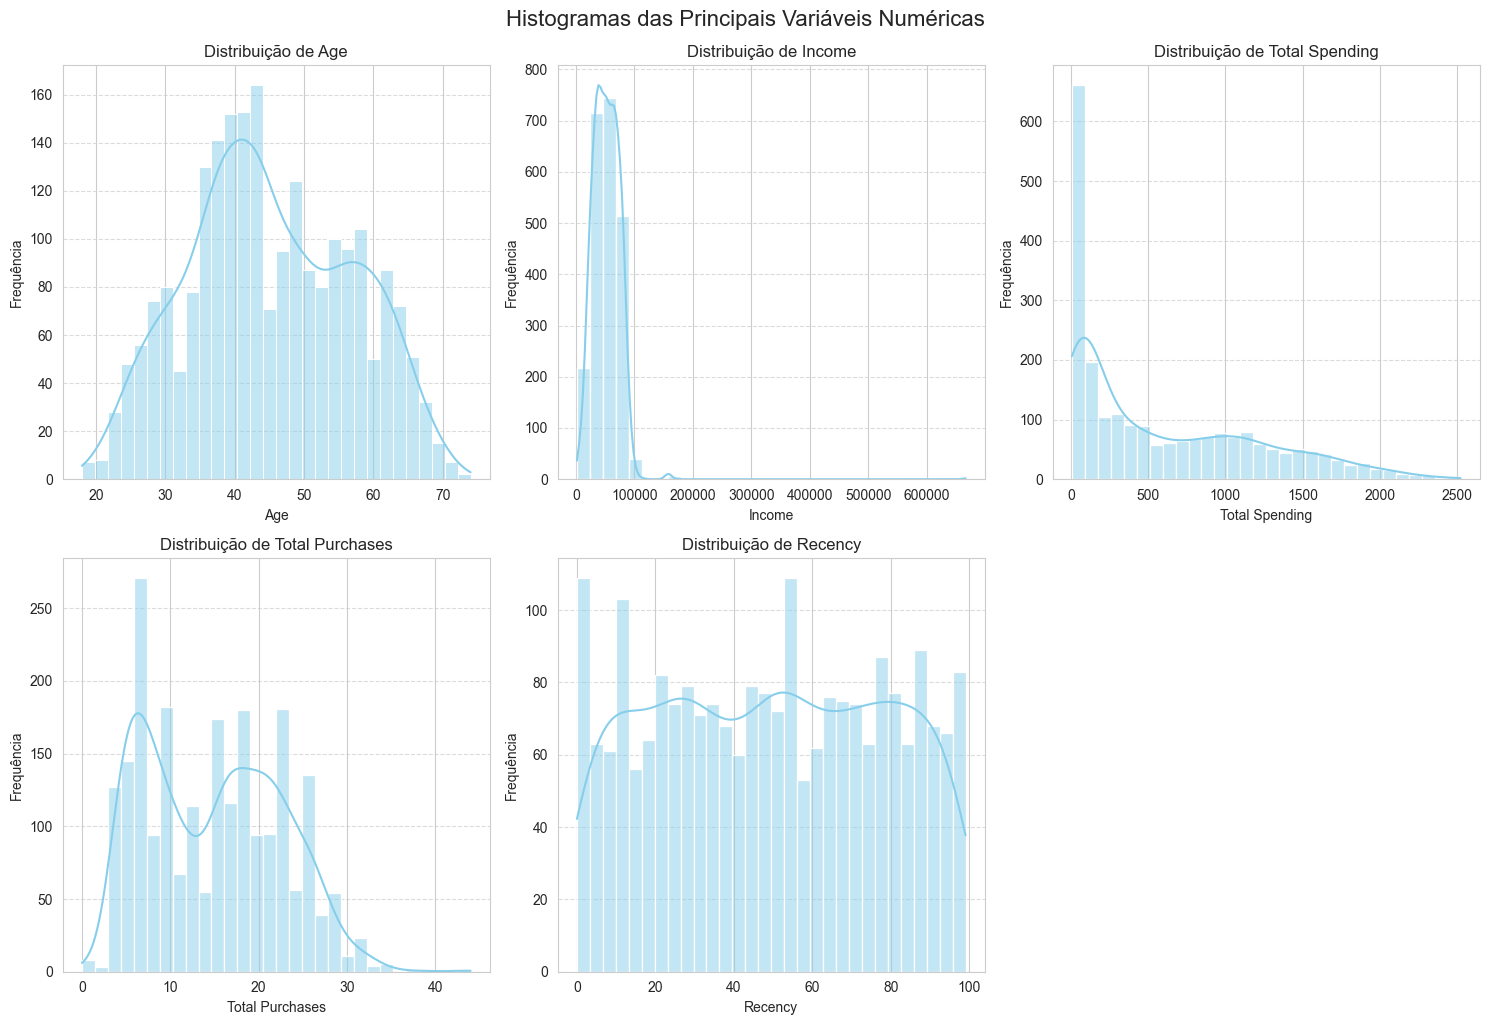

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\396991460.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Children', data=df, palette='viridis')


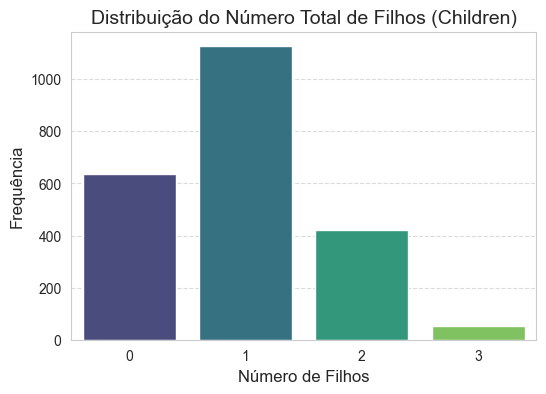

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\396991460.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cividis', order=df[col].value_counts().index)
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\396991460.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cividis', order=df[col].value_counts().index)
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\396991460.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cividis', order=df[c

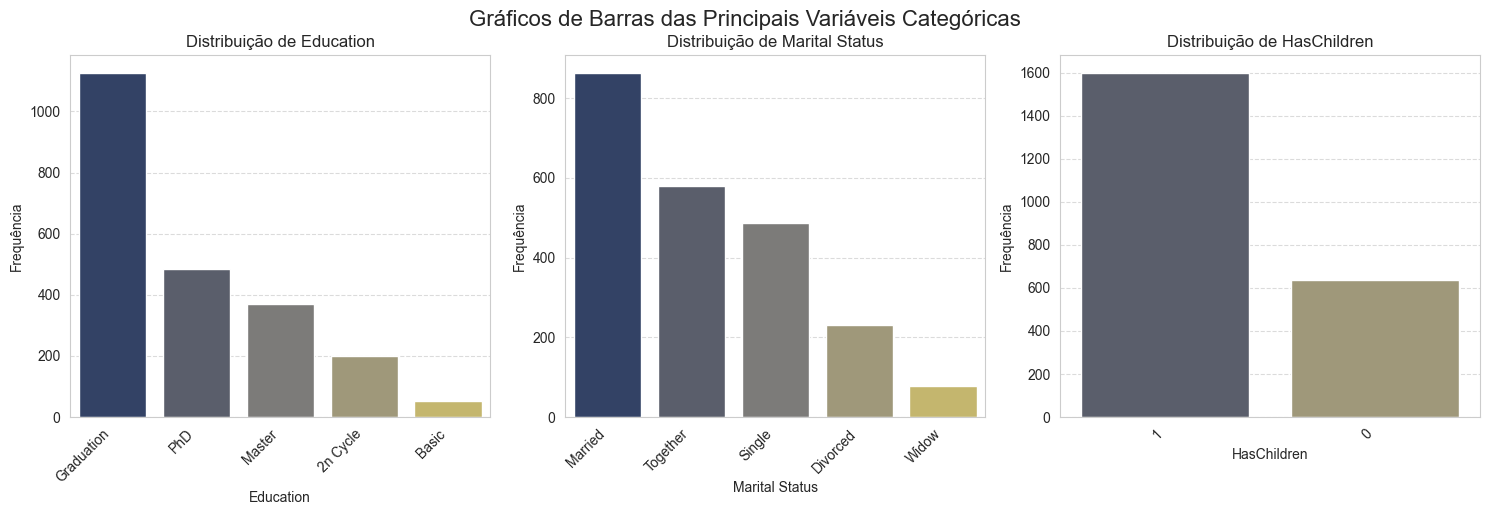

In [76]:
# ### 3.1. Visualização da Distribuição das Variáveis Chave
#
# # Nesta subseção da EDA, visualizamos a distribuição das principais
# # variáveis numéricas e categóricas do dataset.
# #
# # Para as variáveis numéricas como `Age`, `Income`, `Total_Spending`,
# # `Total_Purchases` e `Recency`, utilizamos **histogramas com Kernel
# # Density Estimate (KDE)**. Esses gráficos nos ajudam a compreender
# # a forma da distribuição dos dados, identificar assimetrias,
# # e a presença de múltiplos picos (modas).
# #
# # Para as variáveis categóricas como `Education`, `Marital_Status`,
# # `Children` e `HasChildren`, utilizamos **gráficos de barras**.
# # Estes gráficos são essenciais para visualizar a frequência de cada
# # categoria, revelando a composição da base de clientes em termos
# # de escolaridade, estado civil e estrutura familiar.
# #
# # Essas visualizações são um passo crucial para entender as características
# # de nossos clientes e as relações entre as diferentes features.
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Visualizando a Distribuição de Variáveis Chave ---")

# Configuração para melhorar a visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumenta a resolução para melhor clareza
plt.figure(figsize=(15, 10))

# Lista de colunas numéricas para histogramas
numeric_cols_for_hist = ['Age', 'Income', 'Total_Spending', 'Total_Purchases', 'Recency']

for i, col in enumerate(numeric_cols_for_hist):
    plt.subplot(2, 3, i + 1) # Cria subplots: 2 linhas, 3 colunas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col.replace("_", " ")}', fontsize=12) # Título com nome legível
    plt.xlabel(col.replace("_", " "), fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Histogramas das Principais Variáveis Numéricas', y=1.02, fontsize=16)
plt.show()

# Gráfico de barras para 'Children' (que é numérica, mas com poucos valores únicos)
plt.figure(figsize=(6, 4))
sns.countplot(x='Children', data=df, palette='viridis')
plt.title('Distribuição do Número Total de Filhos (Children)', fontsize=14)
plt.xlabel('Número de Filhos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráficos de barras para colunas categóricas principais
categorical_cols_for_bar = ['Education', 'Marital_Status', 'HasChildren']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols_for_bar):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df, palette='cividis', order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col.replace("_", " ")}', fontsize=12)
    plt.xlabel(col.replace("_", " "), fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Gráficos de Barras das Principais Variáveis Categóricas', y=1.02, fontsize=16)
plt.show()


--- Explorando Relações entre Variáveis Numéricas Chave ---


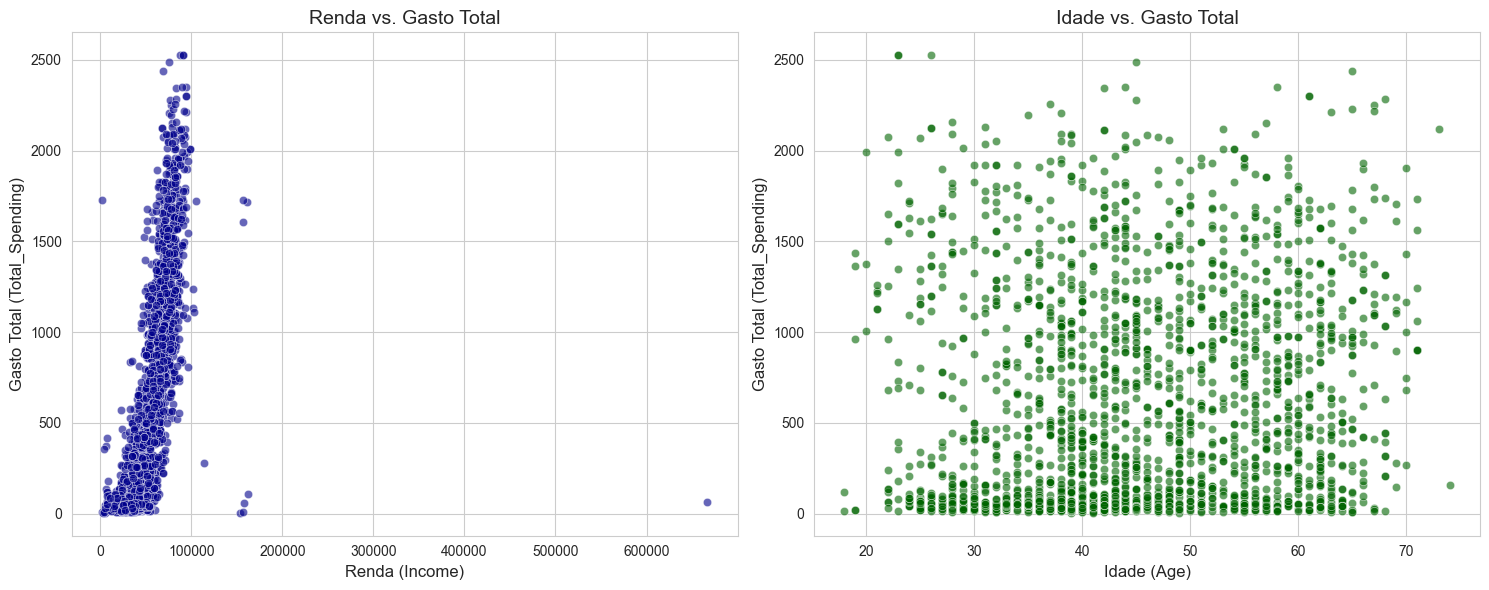


--- Matriz de Correlação entre Variáveis Numéricas Chave ---


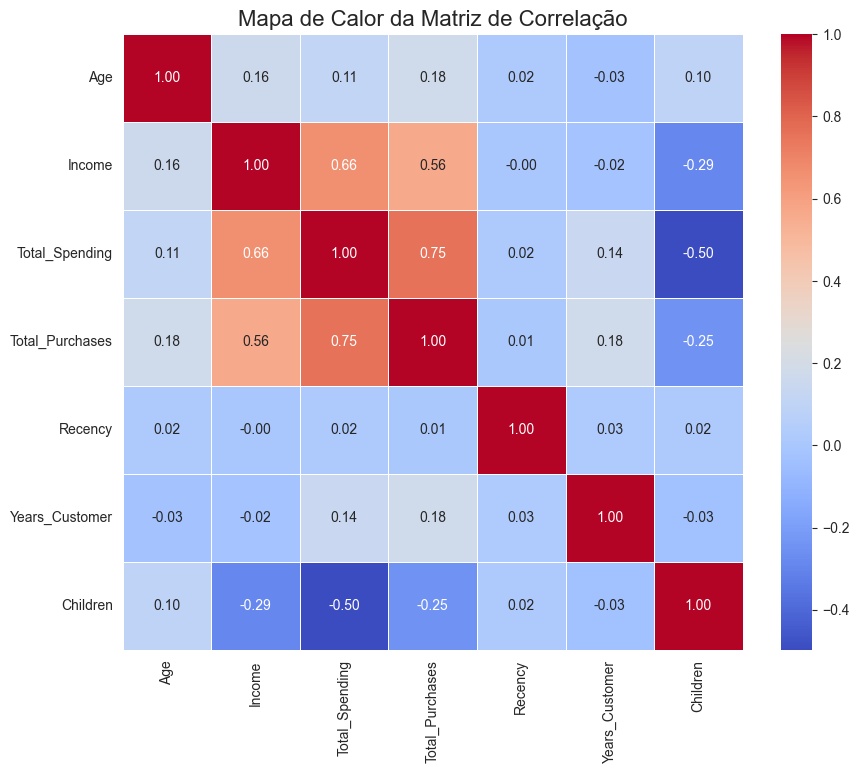

In [77]:
# ### 3.2. Análise de Correlação e Relações entre Variáveis Numéricas
#
# # Nesta subseção, aprofundamos a análise das relações entre as
# # principais variáveis numéricas através de gráficos de dispersão
# # e um mapa de calor da matriz de correlação.
# #
# # Os **gráficos de dispersão** entre `Income` vs. `Total_Spending`
# # e `Age` vs. `Total_Spending` nos permitem visualizar como essas
# # variáveis se relacionam diretamente, buscando padrões de gasto
# # em diferentes faixas de renda e idade.
# #
# # O **mapa de calor da matriz de correlação** oferece uma visão
# # abrangente das interdependências entre todas as variáveis
# # numéricas selecionadas. Coeficientes de correlação próximos a
# # +1 ou -1 indicam fortes relações lineares (positivas ou negativas),
# # enquanto valores próximos de 0 indicam pouca ou nenhuma correlação
# # linear. Esta análise é vital para identificar multicolinearidade
# # e entender a estrutura dos dados para a modelagem futura.
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Explorando Relações entre Variáveis Numéricas Chave ---")

# Configuração geral dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# 1. Gráficos de Dispersão (Scatter Plots) para Renda, Gasto Total e Idade
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Income', y='Total_Spending', data=df, alpha=0.6, color='darkblue')
plt.title('Renda vs. Gasto Total', fontsize=14)
plt.xlabel('Renda (Income)', fontsize=12)
plt.ylabel('Gasto Total (Total_Spending)', fontsize=12)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Total_Spending', data=df, alpha=0.6, color='darkgreen')
plt.title('Idade vs. Gasto Total', fontsize=14)
plt.xlabel('Idade (Age)', fontsize=12)
plt.ylabel('Gasto Total (Total_Spending)', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Mapa de Calor (Heatmap) da Matriz de Correlação
print("\n--- Matriz de Correlação entre Variáveis Numéricas Chave ---")
correlation_matrix = df[['Age', 'Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Years_Customer', 'Children']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=16)
plt.show()


--- Influência de Variáveis Categóricas no Gasto Total ---


C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\2988744979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Total_Spending', data=df, palette='viridis',
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\2988744979.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Total_Spending', data=df, palette='viridis',
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\2988744979.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HasChildren', y='Total_Spending', data=df, palette='viri

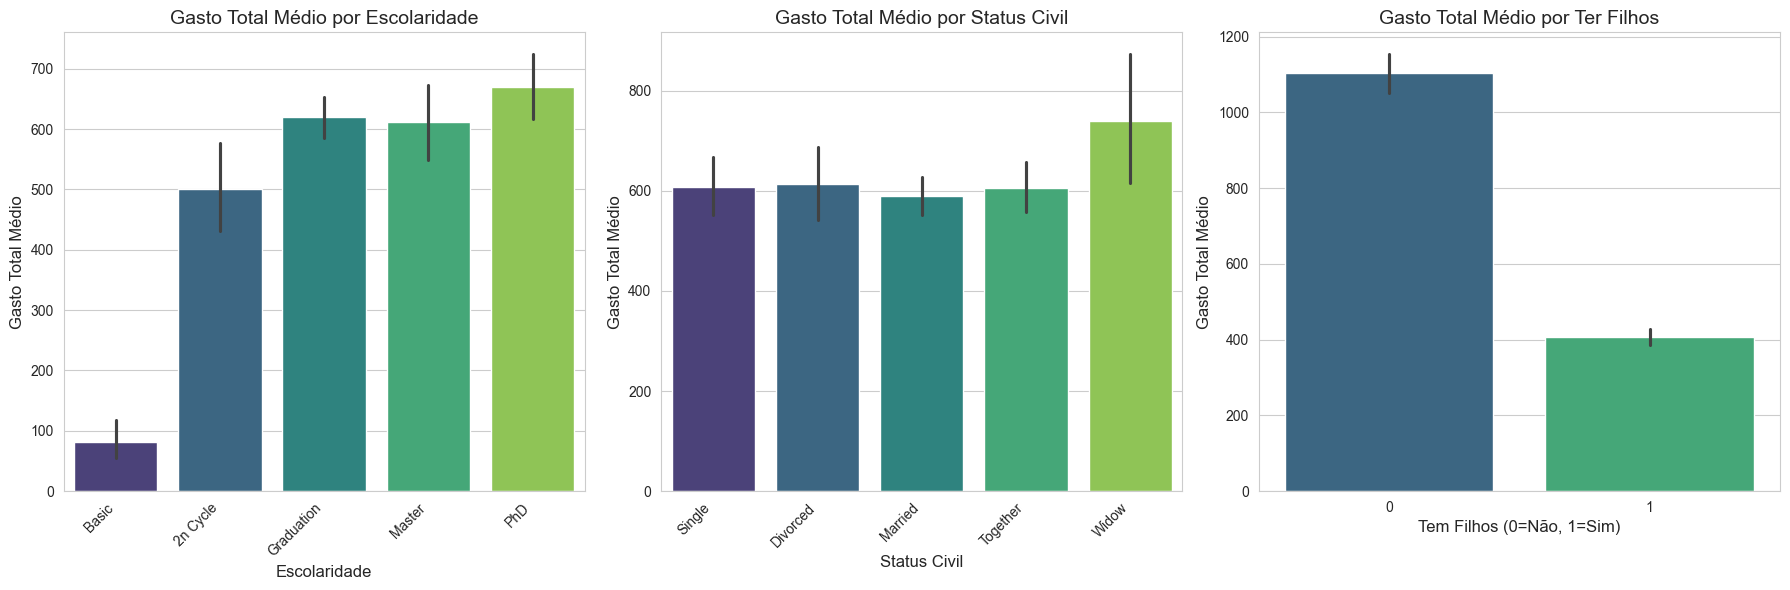

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\2988744979.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='Total_Spending', data=df, palette='viridis',
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\2988744979.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='Total_Spending', data=df, palette='viridis',
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\2988744979.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HasChildren', y='Total_Spending', data=df, palette='viri

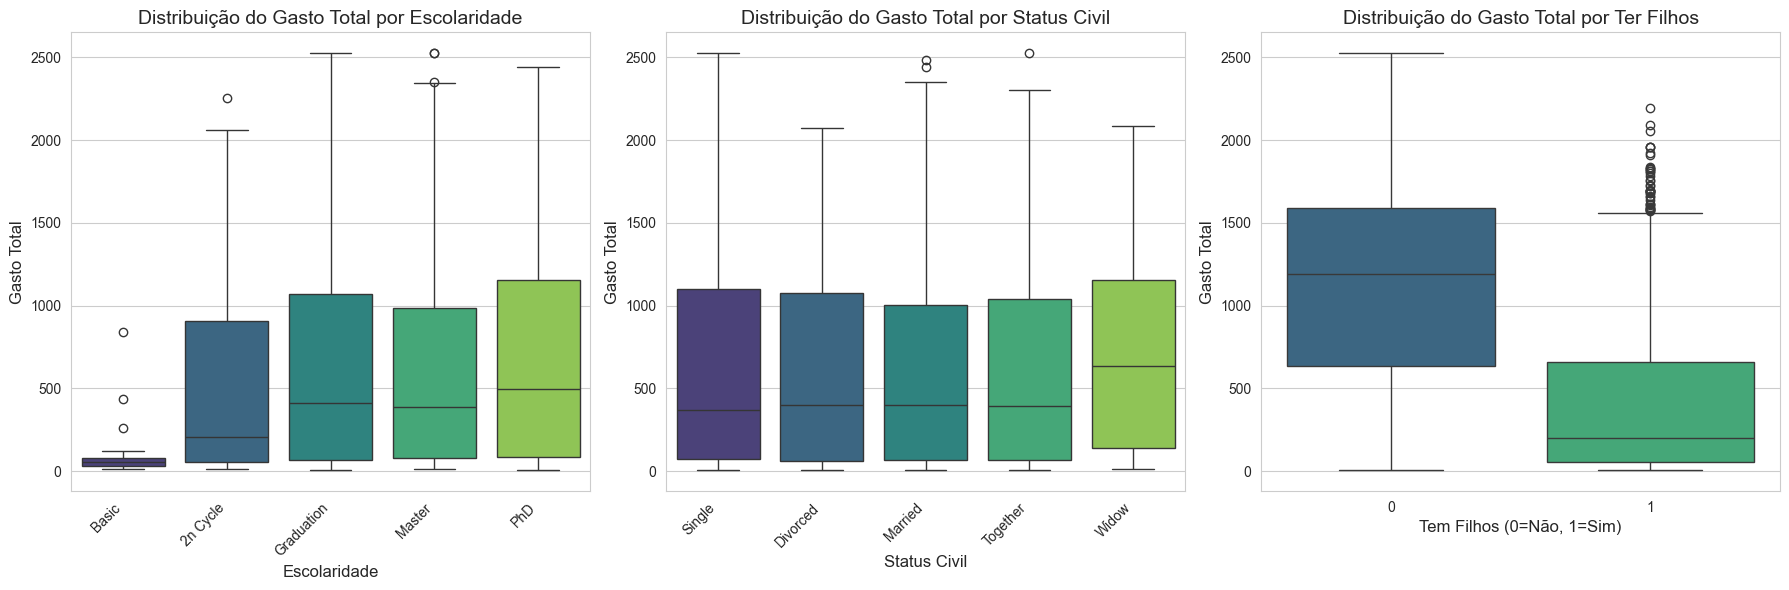

In [78]:
# ### 3.3. Influência de Variáveis Categóricas no Gasto Total
#
# # Nesta subseção, exploramos como as características categóricas
# # dos clientes (Escolaridade, Status Civil e Presença de Filhos)
# # impactam seus hábitos de gasto total (`Total_Spending`).
# #
# # Utilizamos **gráficos de barras** para visualizar a média do
# # gasto total para cada categoria, o que nos permite identificar
# # rapidamente quais grupos gastam mais ou menos.
# #
# # Adicionalmente, empregamos **box plots** para analisar a distribuição
# # do gasto total dentro de cada categoria. Os box plots fornecem uma
# # visão mais detalhada da dispersão dos dados, da mediana, e da presença
# # de outliers, complementando a análise das médias.
# #
# # Esses gráficos são cruciais para entender os perfis de clientes
# # mais valiosos e como diferentes características demográficas
# # se traduzem em poder de compra.
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Influência de Variáveis Categóricas no Gasto Total ---")

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Gráficos de barras para Gasto Total por Categoria
plt.figure(figsize=(18, 6))

# Gasto Total por Escolaridade
plt.subplot(1, 3, 1)
sns.barplot(x='Education', y='Total_Spending', data=df, palette='viridis',
            order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
plt.title('Gasto Total Médio por Escolaridade', fontsize=14)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Gasto Total Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gasto Total por Status Civil
plt.subplot(1, 3, 2)
sns.barplot(x='Marital_Status', y='Total_Spending', data=df, palette='viridis',
            order=['Single', 'Divorced', 'Married', 'Together', 'Widow'])
plt.title('Gasto Total Médio por Status Civil', fontsize=14)
plt.xlabel('Status Civil', fontsize=12)
plt.ylabel('Gasto Total Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gasto Total por HasChildren
plt.subplot(1, 3, 3)
sns.barplot(x='HasChildren', y='Total_Spending', data=df, palette='viridis')
plt.title('Gasto Total Médio por Ter Filhos', fontsize=14)
plt.xlabel('Tem Filhos (0=Não, 1=Sim)', fontsize=12)
plt.ylabel('Gasto Total Médio', fontsize=12)

plt.tight_layout()
plt.show()

# Box Plots para visualizar a distribuição dos gastos por categoria (mais detalhado)
plt.figure(figsize=(18, 6))

# Box Plot para Gasto Total por Escolaridade
plt.subplot(1, 3, 1)
sns.boxplot(x='Education', y='Total_Spending', data=df, palette='viridis',
            order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
plt.title('Distribuição do Gasto Total por Escolaridade', fontsize=14)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Box Plot para Gasto Total por Status Civil
plt.subplot(1, 3, 2)
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df, palette='viridis',
            order=['Single', 'Divorced', 'Married', 'Together', 'Widow'])
plt.title('Distribuição do Gasto Total por Status Civil', fontsize=14)
plt.xlabel('Status Civil', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Box Plot para Gasto Total por HasChildren
plt.subplot(1, 3, 3)
sns.boxplot(x='HasChildren', y='Total_Spending', data=df, palette='viridis')
plt.title('Distribuição do Gasto Total por Ter Filhos', fontsize=14)
plt.xlabel('Tem Filhos (0=Não, 1=Sim)', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)

plt.tight_layout()
plt.show()


--- Análise das Campanhas de Marketing e Resposta ---


C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\1534743830.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_success.index, y=campaign_success.values, palette='plasma')


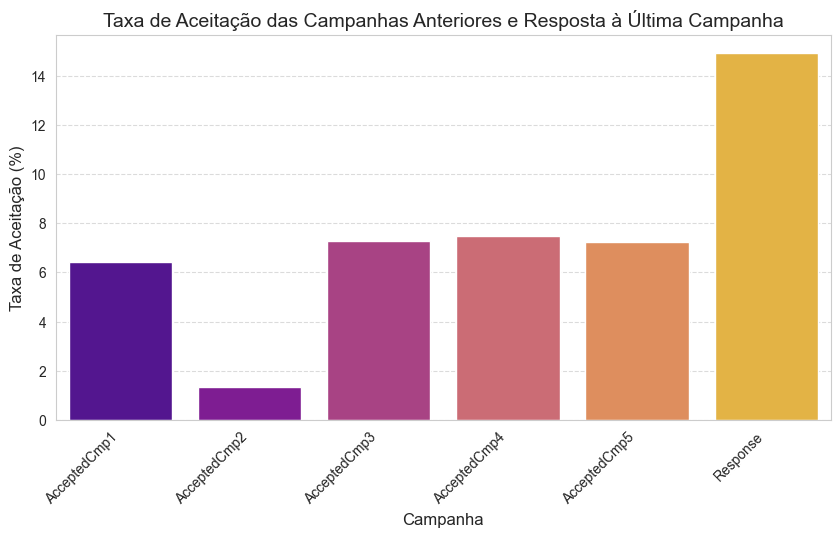


--- Características Médias dos Clientes que Responderam vs. Não Responderam à Última Campanha ---


,Income,Age,Total_Spending,Total_Purchases,Children,Recency,Years_Customer
Response,,,,,,,
0,50831.060168,45.188650,538.759327,14.373095,1.004204,51.512874,0.923279
1,60183.244012,44.583832,987.392216,17.706587,0.646707,35.383234,1.251497


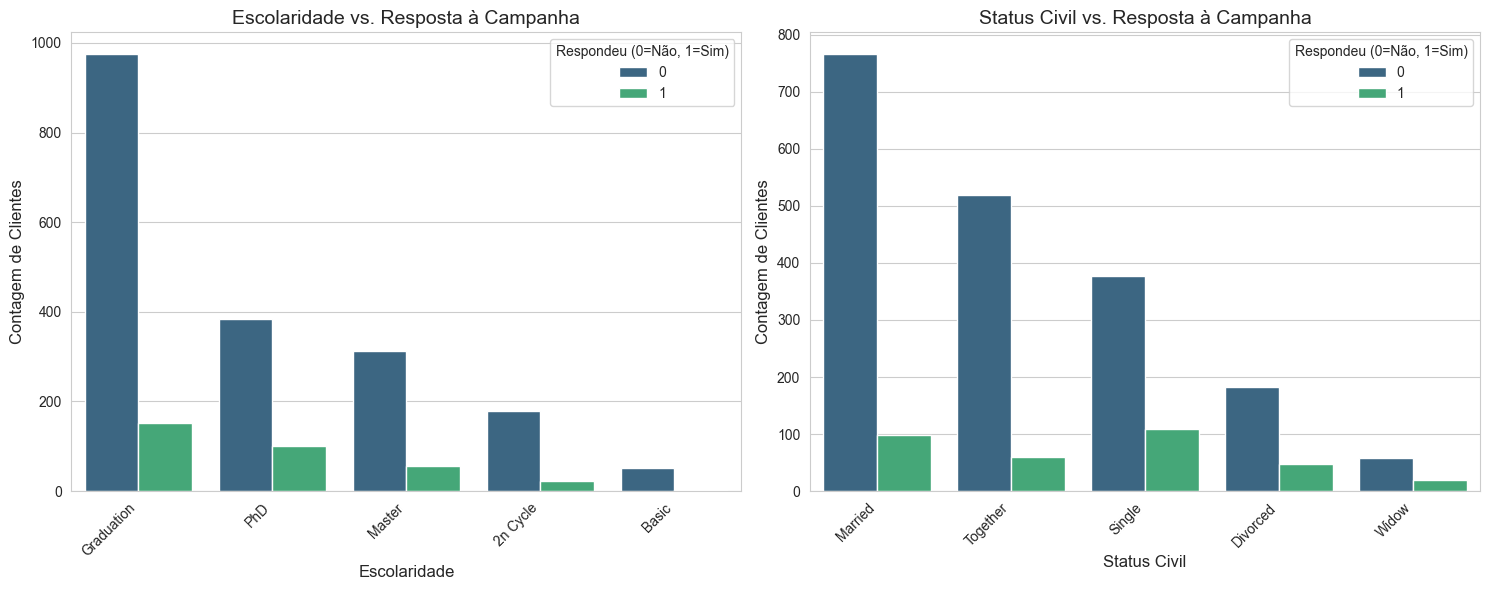

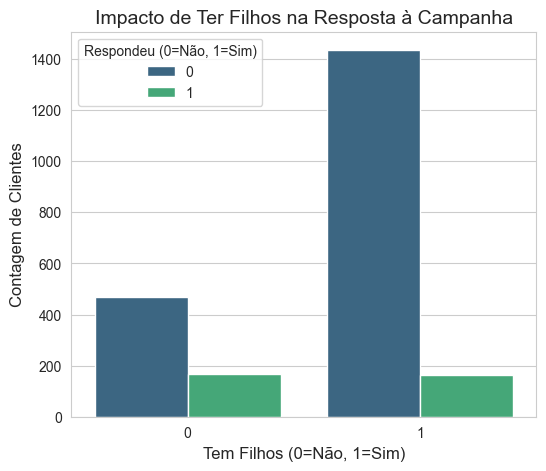

In [79]:
# ### 3.4. Análise da Resposta à Campanha: Fatores de Influência
#
# # Esta subseção é crucial para entender o que impulsiona a resposta
# # dos clientes às campanhas de marketing.
# #
# # 1. **Taxa de Aceitação de Campanhas Anteriores e Atual:**
# #    Visualizamos a taxa de aceitação de todas as campanhas anteriores
# #    (`AcceptedCmp1` a `AcceptedCmp5`) e da campanha mais recente (`Response`).
# #    Isso revela o histórico de engajamento dos clientes com as ofertas.
# #
# # 2. **Comparativo de Características entre Respondentes e Não Respondentes:**
# #    Calculamos as médias das principais variáveis numéricas
# #    (`Income`, `Age`, `Total_Spending`, `Total_Purchases`, `Children`,
# #    `Recency`, `Years_Customer`) para clientes que responderam (`Response=1`)
# #    e os que não responderam (`Response=0`). Essa comparação direta destaca
# #    as características que diferenciam os grupos, fornecendo insights
# #    sobre o perfil do cliente ideal para campanhas.
# #
# # 3. **Impacto da Escolaridade e Status Civil na Resposta:**
# #    Utilizamos gráficos de contagem (`countplot`) para visualizar como
# #    a `Education` e o `Marital_Status` se relacionam com a `Response`.
# #    Isso nos ajuda a identificar quais níveis de escolaridade e estados
# #    civis têm maior propensão a aceitar as ofertas.
# #
# # 4. **Impacto da Presença de Filhos na Resposta:**
# #    Da mesma forma, analisamos o impacto da variável `HasChildren`
# #    na `Response`, verificando se a presença de filhos influencia
# #    a aceitação das campanhas.
# #
# # Os resultados desta análise são fundamentais para direcionar
# # o desenvolvimento do modelo preditivo e refinar as estratégias
# # de segmentação de clientes.
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Análise das Campanhas de Marketing e Resposta ---")

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# 1. Sucesso das Campanhas Anteriores
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_success = df[campaign_cols].sum() / len(df) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_success.index, y=campaign_success.values, palette='plasma')
plt.title('Taxa de Aceitação das Campanhas Anteriores e Resposta à Última Campanha', fontsize=14)
plt.xlabel('Campanha', fontsize=12)
plt.ylabel('Taxa de Aceitação (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Características dos Clientes que Responderam à Última Campanha (Response = 1)
# Comparar médias de variáveis numéricas
print("\n--- Características Médias dos Clientes que Responderam vs. Não Responderam à Última Campanha ---")
response_metrics = df.groupby('Response')[['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Children', 'Recency', 'Years_Customer']].mean()
display(response_metrics)

# 3. Distribuição de Escolaridade e Status Civil para Clientes que Responderam
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Education', hue='Response', data=df, palette='viridis',
              order=df['Education'].value_counts().index)
plt.title('Escolaridade vs. Resposta à Campanha', fontsize=14)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Respondeu (0=Não, 1=Sim)')

plt.subplot(1, 2, 2)
sns.countplot(x='Marital_Status', hue='Response', data=df, palette='viridis',
              order=df['Marital_Status'].value_counts().index)
plt.title('Status Civil vs. Resposta à Campanha', fontsize=14)
plt.xlabel('Status Civil', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Respondeu (0=Não, 1=Sim)')

plt.tight_layout()
plt.show()

# 4. Impacto da presença de filhos na Resposta
plt.figure(figsize=(6, 5))
sns.countplot(x='HasChildren', hue='Response', data=df, palette='viridis')
plt.title('Impacto de Ter Filhos na Resposta à Campanha', fontsize=14)
plt.xlabel('Tem Filhos (0=Não, 1=Sim)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Respondeu (0=Não, 1=Sim)')
plt.show()

In [82]:
# ## 4. Segmentação de Clientes (Clustering)
#
# # Esta seção é dedicada à segmentação da base de clientes, utilizando
# # técnicas de agrupamento (clustering). O objetivo é identificar grupos
# # distintos de clientes com comportamentos e características semelhantes.
# # A segmentação permite que as campanhas de marketing sejam mais
# # direcionadas e eficazes, adaptando a mensagem e a oferta a cada grupo.
# #
# # ### 4.1. Preparação dos Dados para Clustering
# #
# # Antes de aplicar o algoritmo de clustering, é essencial preparar os dados.
# # Selecionamos um subconjunto de features que consideramos mais relevantes
# # para definir o perfil do cliente, como `Income`, `Age`, `Total_Spending`,
# # `Total_Purchases`, `Recency`, `Children` e `Years_Customer`.
# #
# # As variáveis numéricas são então **normalizadas utilizando `StandardScaler`**.
# # A normalização é um passo crucial para algoritmos baseados em distância
# # (como K-Means), pois garante que features com escalas maiores não dominem
# # o cálculo da distância, permitindo que todas as features contribuam
# # igualmente para a formação dos clusters. `HasChildren`, sendo binária,
# # não requer normalização.
# #
# # O DataFrame resultante, `df_clustering`, está agora pronto para a aplicação
# # do algoritmo de agrupamento.
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("\n--- Preparação para Segmentação de Clientes (Clustering) ---")

# Selecionar variáveis para clustering baseadas nos insights da EDA:
# Foco em gastos, compras, renda, filhos e recência.
# Excluímos 'ID', 'Year_Birth', 'Dt_Customer' e as campanhas individuais.
# As variáveis categóricas serão tratadas via one-hot encoding se necessário,
# mas para este primeiro clustering, vamos focar nas numéricas mais impactantes.

features_for_clustering = [
    'Income',
    'Age',
    'Total_Spending',
    'Total_Purchases',
    'Recency',
    'Children', # Combinação de Kidhome e Teenhome, já criada
    'Years_Customer',
    # Incluir HasChildren (binária) - não precisa normalizar, mas pode ser usada
    'HasChildren'
]

# Crie uma cópia do DataFrame apenas com as features selecionadas
df_clustering = df[features_for_clustering].copy()

# Identificar colunas numéricas para normalização (excluir binárias como HasChildren)
numeric_cols_to_scale = [col for col in features_for_clustering if col not in ['HasChildren']]

# Normalização dos dados numéricos usando StandardScaler
# StandardScaler padroniza as features removendo a média e escalando para a variância unitária.
scaler = StandardScaler()
df_clustering[numeric_cols_to_scale] = scaler.fit_transform(df_clustering[numeric_cols_to_scale])

print("\nDataFrame pronto para Clustering (primeiras 5 linhas):\n")
display(df_clustering.head())

print("\nEstatísticas Descritivas do DataFrame Normalizado:\n")
display(df_clustering.describe())


--- Preparação para Segmentação de Clientes (Clustering) ---

DataFrame pronto para Clustering (primeiras 5 linhas):



,Income,Age,Total_Spending,Total_Purchases,Recency,Children,Years_Customer,HasChildren
0,0.236068,1.017296,1.680649,1.319785,0.307272,-1.264618,1.501298,0
1,-0.234982,1.273722,-0.961838,-1.155824,-0.383584,1.395420,-1.420324,1
2,0.774257,0.333495,0.282956,0.798604,-0.798098,-1.264618,0.040487,0
3,-1.021717,-1.290534,-0.918627,-0.895234,-0.798098,0.065401,-1.420324,1
4,0.242259,-1.034108,-0.305371,0.538014,1.550812,0.065401,-1.420324,1



Estatísticas Descritivas do DataFrame Normalizado:



,Income,Age,Total_Spending,Total_Purchases,Recency,Children,Years_Customer,HasChildren
count,2.237000e+03,2.237000e+03,2.237000e+03,2237.000000,2.237000e+03,2.237000e+03,2.237000e+03,2237.000000
mean,1.262587e-16,5.955600e-17,4.923296e-17,0.000000,1.195090e-16,3.176320e-17,7.940799e-19,0.715244
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,1.000224e+00,1.000224e+00,0.451399
min,-2.016857e+00,-2.316236e+00,-9.984003e-01,-1.937596,-1.696210e+00,-1.264618e+00,-1.420324e+00,0.000000
25%,-6.671710e-01,-6.922077e-01,-8.920361e-01,-0.895234,-8.671831e-01,-1.264618e+00,4.048738e-02,0.000000
50%,-3.378540e-02,-9.388133e-02,-3.485813e-01,0.016833,-3.613327e-03,6.540104e-02,4.048738e-02,1.000000
75%,6.411776e-01,8.463457e-01,7.300187e-01,0.798604,8.599565e-01,6.540104e-02,4.048738e-02,1.000000
max,2.454057e+01,2.470374e+00,3.189692e+00,3.795395,1.723526e+00,2.725440e+00,1.501298e+00,1.000000



--- Determinando o Número Ideal de Clusters (Método do Cotovelo) ---


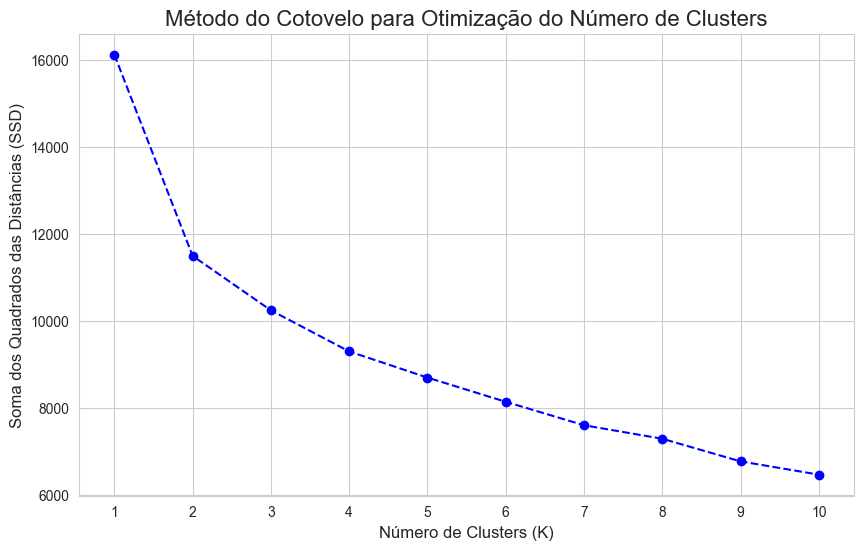


Observação: Procure pelo 'cotovelo' no gráfico, onde a diminuição do SSD começa a desacelerar.



In [83]:
# ### 4.2. Otimização do Número de Clusters: Método do Cotovelo
#
# # Para determinar o número ideal de clusters (K) para o algoritmo
# # K-Means, empregamos o **Método do Cotovelo (Elbow Method)**.
# # Este método analisa a Soma dos Quadrados das Distâncias (SSD - Inertia)
# # dos pontos aos seus respectivos centróides para diferentes valores de K.
# #
# # Um gráfico é plotado com K no eixo X e SSD no eixo Y. O "cotovelo"
# # no gráfico é o ponto onde a diminuição da SSD começa a desacelerar
# # significativamente, indicando que adicionar mais clusters não está
# # explicando muito mais da variância dos dados. Este ponto é frequentemente
# # considerado o número ótimo de clusters, pois representa um bom equilíbrio
# # entre a compressão dos dados e a distinção dos clusters.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Determinando o Número Ideal de Clusters (Método do Cotovelo) ---")

# Lista para armazenar a Soma dos Quadrados das Distâncias (SSD) para diferentes 'k'
ssd = []
K_range = range(1, 11) # Testar de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar warnings
    kmeans.fit(df_clustering)
    ssd.append(kmeans.inertia_) # inertia_ é o atributo que armazena o SSD

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, ssd, marker='o', linestyle='--', color='blue')
plt.title('Método do Cotovelo para Otimização do Número de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Soma dos Quadrados das Distâncias (SSD)', fontsize=12)
plt.xticks(K_range)
plt.grid(True)
plt.show()

print("\nObservação: Procure pelo 'cotovelo' no gráfico, onde a diminuição do SSD começa a desacelerar.\n")


--- Aplicando K-Means e Analisando os Clusters ---

K-Means aplicado com 4 clusters.
Contagem de clientes por cluster:
 Cluster
0    475
1    508
2    616
3    638
Name: count, dtype: int64

Características médias de cada Cluster (Variáveis Numéricas Originais):



,Income,Age,Total_Spending,Total_Purchases,Recency,Children,Years_Customer,HasChildren,Response
Cluster,,,,,,,,,
0,42739.581053,50.951579,130.560000,9.355789,51.566316,1.833684,0.705263,0.987368,0.065263
1,77810.616142,45.988189,1381.094488,20.143701,49.844488,0.027559,0.958661,0.027559,0.312992
2,60926.161526,48.357143,850.121753,22.050325,47.698052,1.168831,1.170455,0.987013,0.121753
3,30522.102665,36.885580,106.208464,7.846395,48.040752,0.818182,0.990596,0.797806,0.108150



Distribuição de Escolaridade por Cluster:



Education,2n Cycle,Basic,Graduation,Master,PhD
Cluster,,,,,
0,0.082105,0.002105,0.463158,0.202105,0.250526
1,0.084646,0.001969,0.521654,0.159449,0.232283
2,0.068182,0.000000,0.521104,0.160714,0.250000
3,0.120690,0.081505,0.503135,0.147335,0.147335



Distribuição de Status Civil por Cluster:



Marital_Status,Divorced,Married,Single,Together,Widow
Cluster,,,,,
0,0.111579,0.381053,0.181053,0.288421,0.037895
1,0.092520,0.344488,0.259843,0.261811,0.041339
2,0.128247,0.412338,0.167208,0.245130,0.047078
3,0.081505,0.398119,0.258621,0.247649,0.014107



Taxa de Resposta (Response) por Cluster:



Cluster
0     6.526316
1    31.299213
2    12.175325
3    10.815047
Name: Response, dtype: float64


Visualizando clusters em relação às variáveis-chave...



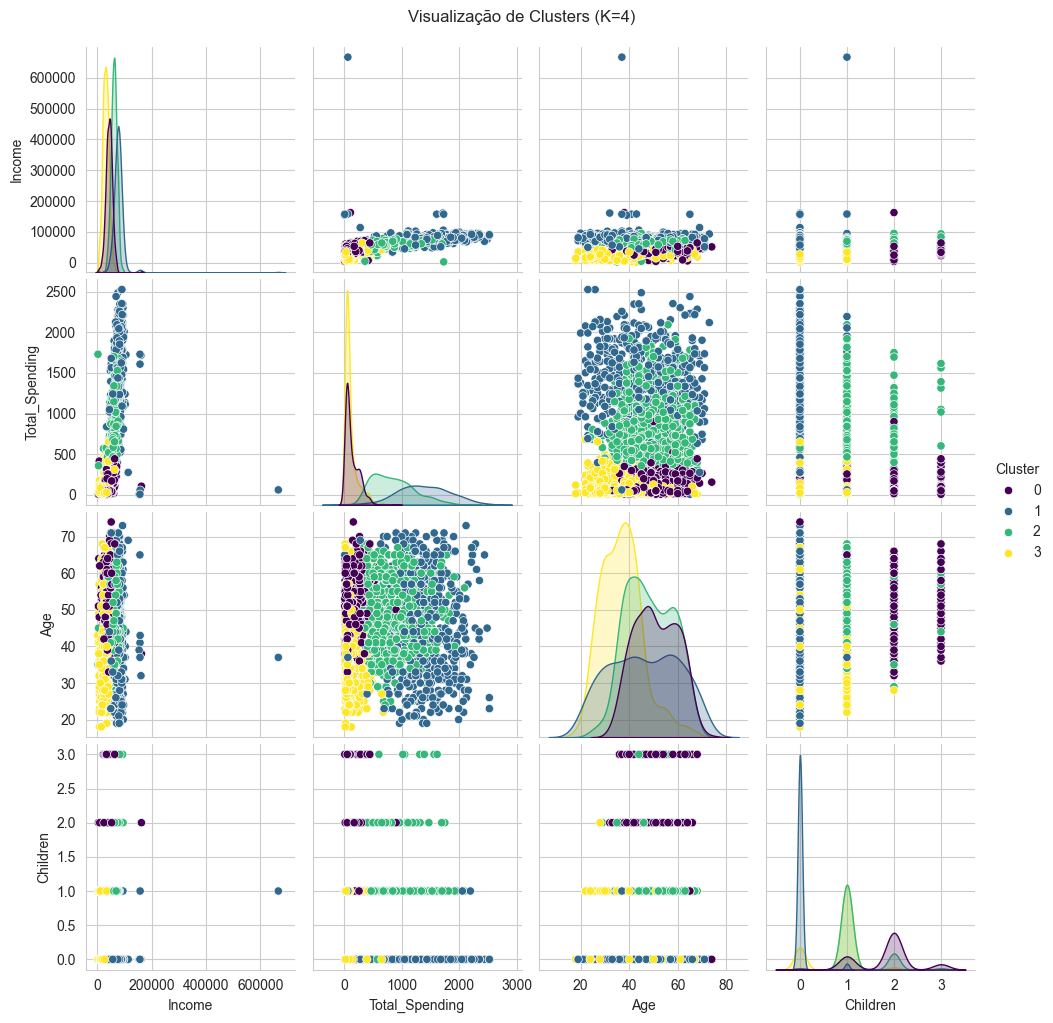

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\1882027354.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total_Spending', data=df, palette='viridis')
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\1882027354.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_16720\1882027354.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Children', data=df, palette='viridis')


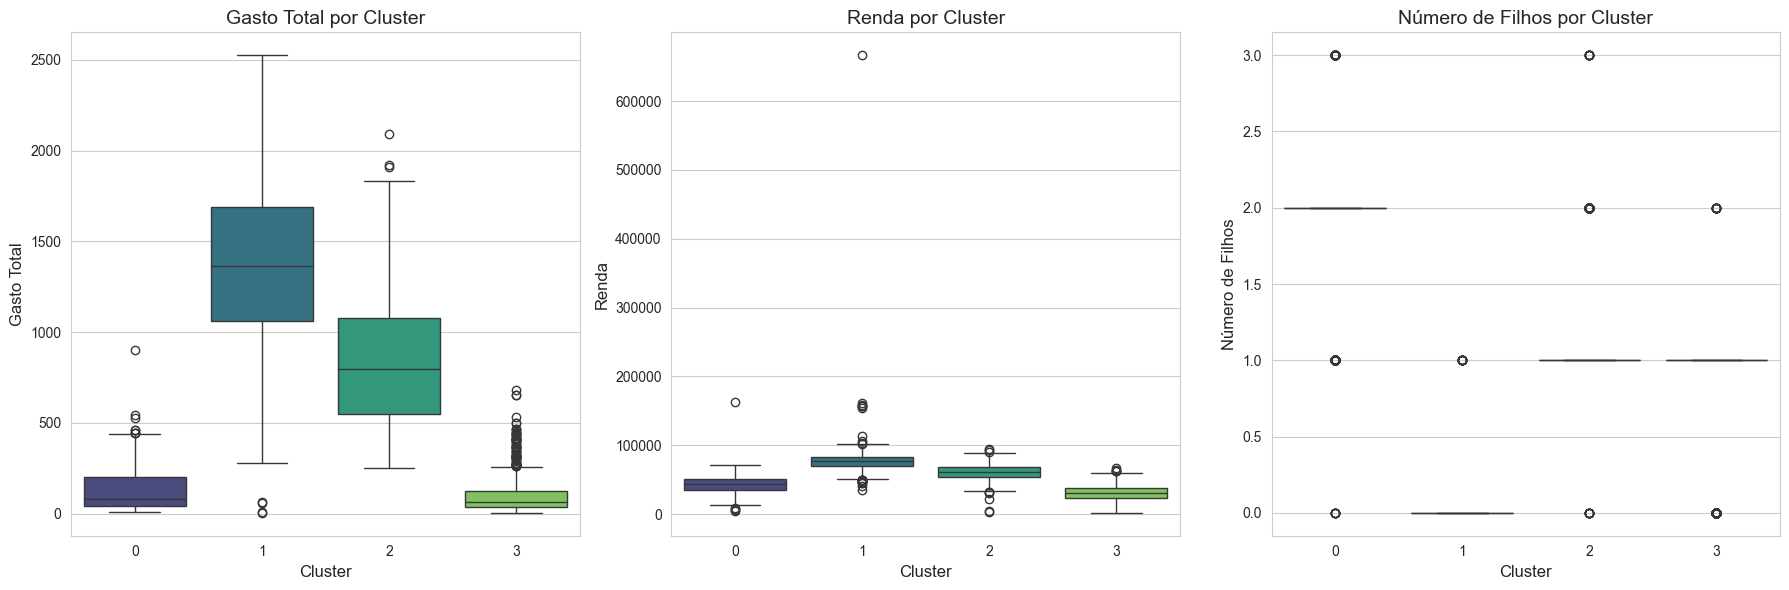

In [84]:
# ### 4.3. Aplicação do K-Means e Caracterização dos Clusters
#
# # Com base na análise do método do cotovelo, escolhemos o número
# # de clusters (`n_clusters_chosen`, por exemplo, 4).
# # Nesta subseção, aplicamos o algoritmo K-Means ao DataFrame
# # normalizado (`df_clustering`) e atribuímos os rótulos de cluster
# # (`Cluster`) de volta ao DataFrame original (`df`).
# #
# # A etapa mais importante é a **caracterização de cada cluster**.
# # Isso envolve:
# # * Calcular as **médias das variáveis numéricas originais**
# #   para cada cluster, o que revela o perfil quantitativo de cada grupo.
# # * Analisar a **distribuição de variáveis categóricas** (como
# #   `Education` e `Marital_Status`) dentro de cada cluster,
# #   usando tabelas de frequência normalizadas.
# # * Calcular a **taxa de resposta à campanha (`Response`) por cluster**,
# #   identificando quais grupos têm maior ou menor propensão a aceitar ofertas.
# #
# # Finalmente, utilizamos **gráficos de dispersão (`pairplot`)**
# # e **box plots** para visualizar a separação e as características
# # dos clusters em relação a variáveis-chave como `Income`, `Total_Spending`,
# # `Age` e `Children`. Essas visualizações são fundamentais para interpretar
# # e nomear os segmentos de clientes descobertos.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("\n--- Aplicando K-Means e Analisando os Clusters ---")

# Definir o número de clusters baseado na análise do cotovelo
n_clusters_chosen = 4 # Escolhendo 4 clusters

# Aplicar o K-Means
kmeans_model = KMeans(n_clusters=n_clusters_chosen, random_state=42, n_init=10)
# Certifique-se de que 'df_clustering' é o DataFrame normalizado
df['Cluster'] = kmeans_model.fit_predict(df_clustering) # Atribui o cluster de volta ao DataFrame original

print(f"\nK-Means aplicado com {n_clusters_chosen} clusters.")
print("Contagem de clientes por cluster:\n", df['Cluster'].value_counts().sort_index())

# Análise das características de cada cluster (APENAS VARIÁVEIS NUMÉRICAS)
print("\nCaracterísticas médias de cada Cluster (Variáveis Numéricas Originais):\n")
# Filtrar apenas as colunas numéricas do DataFrame original para o cálculo da média
numeric_cols_for_mean = [
    'Income', 'Age', 'Total_Spending', 'Total_Purchases',
    'Recency', 'Children', 'Years_Customer', 'HasChildren', 'Response'
]
cluster_means_numeric = df.groupby('Cluster')[numeric_cols_for_mean].mean()
display(cluster_means_numeric)

# Análise para variáveis categóricas
print("\nDistribuição de Escolaridade por Cluster:\n")
education_cluster = df.groupby('Cluster')['Education'].value_counts(normalize=True).unstack(fill_value=0)
display(education_cluster)

print("\nDistribuição de Status Civil por Cluster:\n")
marital_cluster = df.groupby('Cluster')['Marital_Status'].value_counts(normalize=True).unstack(fill_value=0)
display(marital_cluster)

print("\nTaxa de Resposta (Response) por Cluster:\n")
response_cluster = df.groupby('Cluster')['Response'].mean() * 100
display(response_cluster)

# Visualização dos clusters em relação a variáveis chave
# Usaremos gráficos de dispersão (pairplot ou scatter plots)
# Selecionar algumas das variáveis mais influentes
visual_features = ['Income', 'Total_Spending', 'Age', 'Children']

# Adicionar a coluna 'Cluster' para o DataFrame de visualização
df_visual = df[visual_features + ['Cluster']].copy()

# Pairplot para visualizar as relações entre features e clusters
# Isso pode demorar um pouco dependendo do tamanho do dataset
print("\nVisualizando clusters em relação às variáveis-chave...\n")
sns.pairplot(df_visual, hue='Cluster', palette='viridis')
plt.suptitle(f'Visualização de Clusters (K={n_clusters_chosen})', y=1.02) # Ajusta o título
plt.show()

# Outra forma de visualizar: Box plots para as variáveis mais importantes por cluster
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Total_Spending', data=df, palette='viridis')
plt.title('Gasto Total por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
plt.title('Renda por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Renda', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Children', data=df, palette='viridis')
plt.title('Número de Filhos por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Número de Filhos', fontsize=12)

plt.tight_layout()
plt.show()

In [85]:
# ## 5. Modelagem Preditiva: Previsão de Resposta à Campanha
#
# # Esta seção foca na construção de um modelo de classificação para
# # prever a probabilidade de um cliente responder à próxima campanha
# # de marketing (`Response`).
# #
# # ### 5.1. Preparação dos Dados para o Modelo Preditivo
# #
# # Antes de treinar o modelo, os dados precisam ser adequadamente preparados:
# #
# # 1.  **Definição de Features (X) e Target (y):**
# #     Identificamos as variáveis que serão usadas como features (preditoras)
# #     e a variável `Response` como o target (o que queremos prever).
# #     Colunas como `ID`, `Dt_Customer` e `Cluster` são removidas das features,
# #     pois não são relevantes para a previsão direta ou são resultados de
# #     análises anteriores.
# #
# # 2.  **Codificação de Variáveis Categóricas (One-Hot Encoding):**
# #     Variáveis categóricas como `Education` e `Marital_Status` precisam
# #     ser convertidas em um formato numérico que os algoritmos de
# #     machine learning possam entender. Utilizamos `OneHotEncoder`
# #     para criar novas colunas binárias para cada categoria,
# #     evitando a suposição de ordenação que não existe.
# #
# # 3.  **Divisão dos Dados em Conjuntos de Treino e Teste:**
# #     Para avaliar a performance do modelo de forma imparcial,
# #     dividimos os dados em conjuntos de treino (80%) e teste (20%)
# #     usando `train_test_split`. A estratificação (`stratify=y`)
# #     garante que a proporção da classe target (`Response`) seja
# #     mantida em ambos os conjuntos, o que é crucial em datasets
# #     com classes desbalanceadas.
# #
# # Esta etapa de preparação é fundamental para garantir que o modelo
# # seja treinado e avaliado corretamente.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

print("\n--- Preparando os Dados para o Modelo Preditivo ---")

# 1. Definir Features (X) e Target (y)
# Excluímos 'ID' e 'Dt_Customer' que não são features para o modelo preditivo diretamente
# 'Response' é a variável target
# Incluiremos as variáveis categóricas que precisam ser encodificadas
features = [col for col in df.columns if col not in ['ID', 'Dt_Customer', 'Response', 'Cluster']]
X = df[features]
y = df['Response']

print(f"\nVariáveis Features (X): {X.columns.tolist()}")
print(f"Variável Target (y): {y.name}")

# 2. Codificação de Variáveis Categóricas (One-Hot Encoding)
# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
print(f"\nVariáveis Categóricas para One-Hot Encoding: {categorical_cols.tolist()}")

# Aplicar One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(X[categorical_cols])

# Criar um DataFrame com as features encodificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

# Remover as colunas categóricas originais e concatenar as encodificadas
X_encoded = X.drop(columns=categorical_cols)
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

print("\nShape de X (antes do encoding):", X.shape)
print("Shape de X_encoded (depois do encoding):", X_encoded.shape)
print("Primeiras 5 linhas de X_encoded:")
display(X_encoded.head())


# 3. Divisão dos Dados em Conjuntos de Treino e Teste
# Usaremos 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nProporção da classe Target (y) no conjunto de treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção da classe Target (y) no conjunto de teste:")
print(y_test.value_counts(normalize=True))


--- Preparando os Dados para o Modelo Preditivo ---

Variáveis Features (X): ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Years_Customer', 'Age', 'Total_Spending', 'Total_Purchases', 'Children', 'HasChildren']
Variável Target (y): Response

Variáveis Categóricas para One-Hot Encoding: ['Education', 'Marital_Status']

Shape de X (antes do encoding): (2237, 30)
Shape de X_encoded (depois do encoding): (2237, 38)
Primeiras 5 linhas de X_encoded:


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Years_Customer,Age,Total_Spending,Total_Purchases,Children,HasChildren,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,2,57,1617,25,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,6,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,1,49,776,21,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,8,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,19,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0



Shape de X_train: (1789, 38)
Shape de X_test: (448, 38)
Shape de y_train: (1789,)
Shape de y_test: (448,)

Proporção da classe Target (y) no conjunto de treino:
Response
0    0.850755
1    0.149245
Name: proportion, dtype: float64

Proporção da classe Target (y) no conjunto de teste:
Response
0    0.850446
1    0.149554
Name: proportion, dtype: float64



--- Construindo e Treinando o Modelo Preditivo (Regressão Logística) ---

Modelo de Regressão Logística treinado com sucesso.

--- Avaliação do Desempenho do Modelo ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       381
           1       0.44      0.76      0.56        67

    accuracy                           0.82       448
   macro avg       0.70      0.80      0.72       448
weighted avg       0.88      0.82      0.84       448


Matriz de Confusão:


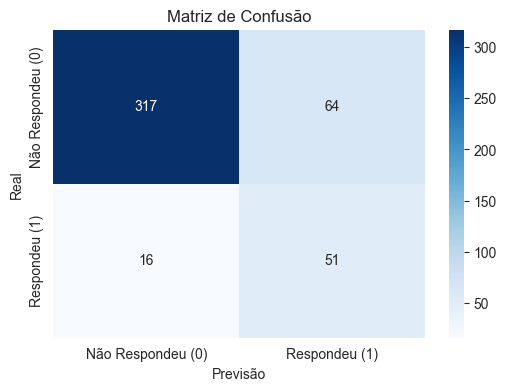

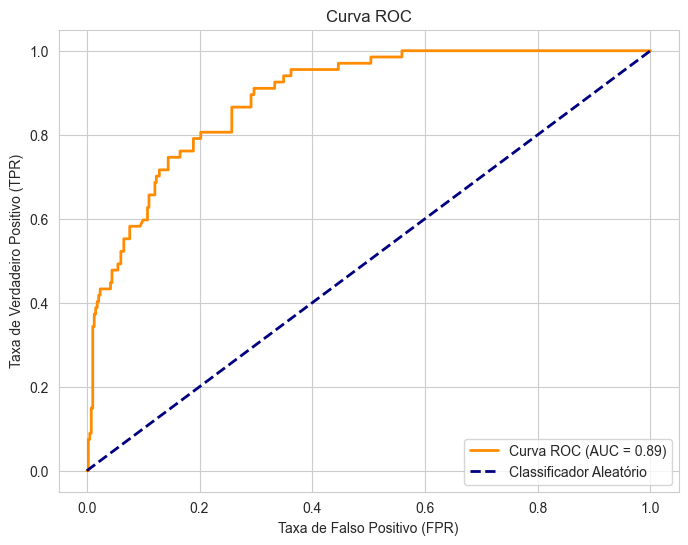


Área sob a Curva ROC (AUC): 0.89

--- Importância das Features (Coeficientes do Modelo) ---


,Feature,Coefficient
16,AcceptedCmp3,1.997814e+00
18,AcceptedCmp5,1.652769e+00
19,AcceptedCmp1,1.327628e+00
22,Years_Customer,1.223604e+00
17,AcceptedCmp4,1.190598e+00
32,Education_PhD,7.912392e-01
20,AcceptedCmp2,7.371977e-01
2,Kidhome,5.699995e-01
33,Marital_Status_Divorced,5.195439e-01
37,Marital_Status_Widow,4.725659e-01


In [88]:
# ### 5.2. Construção e Avaliação do Modelo de Regressão Logística
#
# # Nesta subseção, implementamos e avaliamos um modelo de **Regressão Logística**
# # para prever a `Response` (resposta à campanha).
# #
# # 1.  **Instanciação e Treinamento do Modelo:**
# #     Utilizamos `LogisticRegression` com `class_weight='balanced'` para mitigar
# #     o desbalanceamento da classe target (já que a maioria dos clientes
# #     provavelmente não responde à campanha). O `solver='liblinear'` é adequado
# #     para datasets menores. O modelo é treinado (`fit`) com os dados de treino.
# #
# # 2.  **Previsões no Conjunto de Teste:**
# #     Após o treino, o modelo é usado para fazer previsões (`predict`) das classes
# #     e probabilidades (`predict_proba`) no conjunto de teste, permitindo uma
# #     avaliação imparcial de seu desempenho.
# #
# # 3.  **Avaliação do Desempenho do Modelo:**
# #     A performance é avaliada por métricas chave:
# #     * **Relatório de Classificação:** Fornece precisão, recall, F1-score e suporte.
# #     * **Matriz de Confusão:** Visualiza True Positives, True Negatives, False Positives
# #         e False Negatives, mostrando os erros e acertos do modelo.
# #     * **Curva ROC e AUC (Área sob a Curva):** Avalia a capacidade do modelo de
# #         distinguir entre as classes positivas e negativas em diferentes limiares.
# #         Um AUC mais próximo de 1 indica melhor desempenho.
# #
# # 4.  **Interpretabilidade dos Coeficientes:**
# #     Analisamos os coeficientes do modelo para entender a **importância das features**.
# #     Coeficientes positivos indicam que a feature aumenta a probabilidade de resposta,
# #     enquanto negativos a diminuem. Isso oferece insights sobre quais características
# #     dos clientes são mais preditivas de uma resposta positiva.
# #
# # Esta avaliação completa nos dá uma visão robusta da capacidade do modelo
# # de prever a resposta à campanha.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n--- Construindo e Treinando o Modelo Preditivo (Regressão Logística) ---")

# 1. Instanciar e Treinar o Modelo
# Definir o modelo de Regressão Logística
# class_weight='balanced' é útil para lidar com o desbalanceamento das classes
# solver='liblinear' é bom para datasets menores e para usar L1/L2 regularization
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)

# Treinar o modelo com os dados de treino
log_reg_model.fit(X_train, y_train)

print("\nModelo de Regressão Logística treinado com sucesso.")

# 2. Fazer Previsões no Conjunto de Teste
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # Probabilidades da classe positiva (1)

# 3. Avaliar o Desempenho do Modelo
print("\n--- Avaliação do Desempenho do Modelo ---")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Respondeu (0)', 'Respondeu (1)'],
            yticklabels=['Não Respondeu (0)', 'Respondeu (1)'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"\nÁrea sob a Curva ROC (AUC): {roc_auc:.2f}")

# Coeficientes do Modelo (para interpretabilidade)
# Isso nos ajuda a entender quais features são mais importantes
print("\n--- Importância das Features (Coeficientes do Modelo) ---")
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
display(coefficients)


--- Otimização do Lucro da Campanha ---
Custo por contato: 3.00 MU
Receita por aceitação: 10.93 MU

Lucro máximo encontrado: 233.86 MU
Melhor limiar de probabilidade: 0.58
Número de clientes contatados no melhor limiar: 97
Número de respondentes reais no melhor limiar: 48
Taxa de sucesso da campanha no melhor limiar: 49.48%


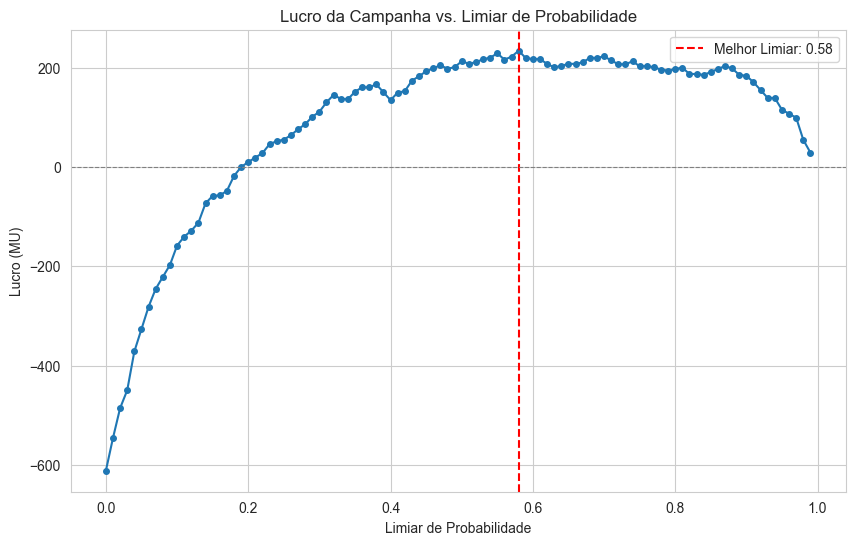


Lucro da Campanha Piloto: -3046.00 MU
Melhora no Lucro em relação à Campanha Piloto: 3279.86 MU


In [87]:
# ## 6. Otimização do Lucro da Campanha
#
# # Nesta seção final, vamos além da simples previsão e focamos
# # na **otimização do lucro da campanha de marketing**.
# #
# # Um modelo preditivo pode indicar quem provavelmente responderá,
# # mas precisamos de uma estratégia para maximizar o retorno financeiro.
# # Para isso, calculamos o lucro da campanha considerando os custos
# # de contato e as receitas por aceitação.
# #
# # 1.  **Definição de Custos e Receitas:**
# #     Estimamos o custo por contato e a receita por aceitação com base
# #     nos dados da campanha piloto fornecidos.
# #
# # 2.  **Cálculo do Lucro por Limiar:**
# #     Desenvolvemos uma função que simula o lucro da campanha para
# #     diferentes limiares de probabilidade. Ao aplicar um limiar,
# #     selecionamos apenas os clientes cuja probabilidade de resposta
# #     prevista pelo modelo é superior a esse limiar. Calculamos então
# #     o custo total dos contatos e a receita gerada pelas respostas reais.
# #
# # 3.  **Determinação do Limiar Ótimo:**
# #     Iteramos sobre uma gama de limiares (de 0% a 99%) para encontrar
# #     aquele que resulta no lucro máximo.
# #
# # 4.  **Análise dos Resultados:**
# #     Exibimos o lucro máximo alcançado, o limiar de probabilidade ideal,
# #     o número de clientes que seriam contatados, o número de respostas
# #     reais esperadas e a taxa de sucesso da campanha otimizada.
# #
# # 5.  **Visualização do Lucro vs. Limiar:**
# #     Um gráfico é gerado para mostrar como o lucro varia em função
# #     do limiar de probabilidade, destacando visualmente o ponto de lucro máximo.
# #
# # 6.  **Comparação com a Campanha Piloto:**
# #     Finalmente, comparamos o lucro máximo otimizado pelo modelo
# #     com o lucro obtido na campanha piloto original, quantificando
# #     o valor adicionado pela abordagem preditiva.
# #
# # Esta análise de otimização de lucro é crucial para transformar
# # as previsões do modelo em decisões de negócio estratégicas e financeiramente vantajosas.
print("\n--- Otimização do Lucro da Campanha ---")

# Definir os custos e receitas por cliente, conforme dados do caso
cost_per_contact = 6720 / 2240 # Custo total da campanha piloto / Número de clientes na piloto
revenue_per_accepted = 3674 / (2240 * 0.15) # Receita total da campanha piloto / (Número de clientes * Taxa de sucesso)

print(f"Custo por contato: {cost_per_contact:.2f} MU")
print(f"Receita por aceitação: {revenue_per_accepted:.2f} MU")

def calculate_profit(y_true, y_pred_proba, threshold, cost_per_contact, revenue_per_accepted):
    # Clientes selecionados para a campanha (previsão > threshold)
    selected_for_campaign = (y_pred_proba >= threshold)

    # Número de clientes contatados
    num_contacts = selected_for_campaign.sum()

    # Custo total da campanha
    total_cost = num_contacts * cost_per_contact

    # Clientes que realmente responderam E foram contatados
    true_positives = (y_true[selected_for_campaign] == 1).sum()

    # Receita total gerada
    total_revenue = true_positives * revenue_per_accepted

    # Lucro
    profit = total_revenue - total_cost
    return profit, num_contacts, true_positives

# Testar vários limiares para encontrar o que maximiza o lucro
thresholds = np.arange(0.0, 1.0, 0.01) # Limiares de 0% a 99%
profits = []
num_contacts_list = []
true_positives_list = []

for t in thresholds:
    profit, num_contacts, true_positives = calculate_profit(y_test, y_pred_proba, t, cost_per_contact, revenue_per_accepted)
    profits.append(profit)
    num_contacts_list.append(num_contacts)
    true_positives_list.append(true_positives)

# Encontrar o limiar que maximiza o lucro
max_profit_idx = np.argmax(profits)
best_threshold = thresholds[max_profit_idx]
max_profit = profits[max_profit_idx]
best_num_contacts = num_contacts_list[max_profit_idx]
best_true_positives = true_positives_list[max_profit_idx]
best_success_rate = (best_true_positives / best_num_contacts) * 100 if best_num_contacts > 0 else 0

print(f"\nLucro máximo encontrado: {max_profit:.2f} MU")
print(f"Melhor limiar de probabilidade: {best_threshold:.2f}")
print(f"Número de clientes contatados no melhor limiar: {best_num_contacts}")
print(f"Número de respondentes reais no melhor limiar: {best_true_positives}")
print(f"Taxa de sucesso da campanha no melhor limiar: {best_success_rate:.2f}%")

# Plotar o lucro em função do limiar
plt.figure(figsize=(10, 6))
plt.plot(thresholds, profits, marker='o', linestyle='-', markersize=4)
plt.title('Lucro da Campanha vs. Limiar de Probabilidade')
plt.xlabel('Limiar de Probabilidade')
plt.ylabel('Lucro (MU)')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Melhor Limiar: {best_threshold:.2f}')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Linha do lucro zero
plt.grid(True)
plt.legend()
plt.show()

# Comparação com o lucro da campanha piloto
pilot_profit = 3674 - 6720 # Receita - Custo
print(f"\nLucro da Campanha Piloto: {pilot_profit:.2f} MU")
print(f"Melhora no Lucro em relação à Campanha Piloto: {max_profit - pilot_profit:.2f} MU")